Import de todas las librerias necesarias.
Nummpy: Operaciones numéricas eficientes y generación de datos aleatorios
Pandas: Manipulación estructurada de datos
Faker: Generación de datos realistas
Matplotlib: Visualización gráfica de datos

In [1]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

Inicializamos el generador de datos "Faker" para generar datos realistas como los nombres. Mediante "es_ES" generamos datos en castellano, por defecto los crearía en inglés.

In [2]:
fake = Faker('es_ES')

Configuramos las probabilidades para crear las notas. Suponemos que sacar entre 5 y 7 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [3]:
prob_5_7 = 0.5  
prob_resto = 1 - prob_5_7 

Generamos las 100 notas gracias a la librería numpy y su función random. Estas se encontrarán entre 1 y 10.

In [4]:
notas = np.where(
    np.random.rand(100) < prob_5_7,  
    np.clip(np.random.normal(loc=6, scale=1, size=100), 5, 7),  
    np.random.randint(1, 11, size=100) 
)

Creamos un diccionario de datos estructurado que luego se convertirá en un DataFrame de pandas.
Generamos una lista de 100 nombres completos aleatorios en español usando Faker, asignamos aleatoriamente una de las 3 asignaturas a cada estudiante y finalmente Asignamos las notas generadas previamente (array NumPy) y las convertimos a enteros.



In [5]:
data = {
    'Nombre': [fake.name() for _ in range(100)],
    'Asignatura': np.random.choice(['Matemáticas', 'Física', 'Programación'], 100),
    'Nota': notas.astype(int)  # Convertir a enteros
}

Convertimos el diccionario data en una tabla estructurada (DataFrame) de pandas con columnas "Nombre", "Asignatura" y "Nota" y lo guardamos en csv (alumnos_deusto).

In [6]:
df = pd.DataFrame(data)
df.to_csv('alumnos_deusto.csv', index=False)

Creamos un histograma con las notas del DataFrame, dividiéndolas en 10 intervalos (bins) y añadiendo bordes negros (edgecolor).
Le añadimos título al gráfico ("Distribución de Notas") y etiquetas a los ejes (X: "Nota", Y: "Frecuencia") ty mostramos el histograma.

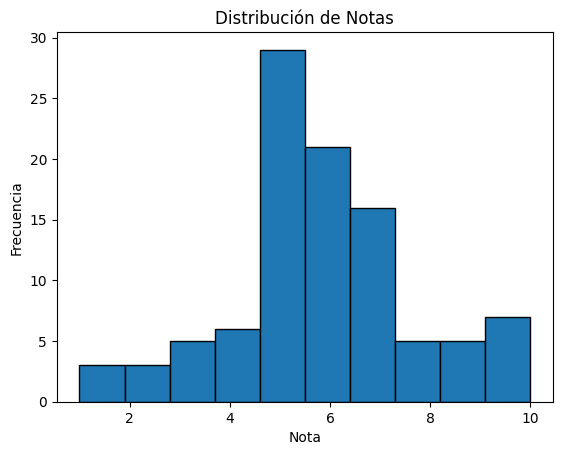

In [7]:
plt.hist(df['Nota'], bins=10, edgecolor='black')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver, la mayoría de notas, efectivamente se sitúan entre el 5 y el 7, creando una distribución normal.